In [14]:
# Remember to upload optipaw_FINAL.csv

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Set options to display all unique values
# pd.set_option('display.max_rows', None)  # Display all rows
# pd.set_option('display.max_columns', None)  # Display all columns

# Load Optipaw Data
optipaw_data = pd.read_csv('optipaw_FINAL.csv')

# Extract rows where the 'State' column is 'Austin'
austin_data = optipaw_data[optipaw_data['State'] == 'Austin'].copy()

# Reset the index for the Austin data (optional but useful for clean DataFrames)
austin_data.reset_index(drop=True, inplace=True)

# Display the first few rows of the extracted data
print(austin_data.head())

  Animal.ID    Name Animal.Type                        Breed            Sex  \
0   A006100   Scamp         Dog         Spinone Italiano Mix  Neutered Male   
1   A006100   Scamp         Dog         Spinone Italiano Mix  Neutered Male   
2   A047759    Oreo         Dog                    Dachshund  Neutered Male   
3   A134067  Bandit         Dog            Shetland Sheepdog  Neutered Male   
4   A141142  Bettie         Dog  Labrador Retriever/Pit Bull  Spayed Female   

          Color   Age      Intake.Type     Outcome.Type          Intake.Date  \
0  Yellow/White   7.0    Public Assist  Return to Owner  2014-12-19 10:21:00   
1  Yellow/White   6.0    Public Assist  Return to Owner  2014-03-07 14:26:00   
2      Tricolor  10.0  Owner Surrender         Transfer  2014-04-02 15:55:00   
3   Brown/White  16.0    Public Assist  Return to Owner  2013-11-16 09:02:00   
4   Black/White  15.0            Stray  Return to Owner  2013-11-16 14:46:00   

          Outcome.Date   State  
0  2014-12-

In [15]:
# Preprocessing Function for ML
def preprocessing(df, name_mapping_var=None):

  # For Name, we will use label encoding to assign each unique name a specific int, at the same time return the mapping
  # Strip leading asterisks from the Name column
  df['Name'] = df['Name'].str.lstrip('*')
  label_encoder = LabelEncoder()
  df['Name'] = label_encoder.fit_transform(df['Name'].astype(str))

  # If the user provided a variable to store the mapping, assign it
  if name_mapping_var is not None:
      name_mapping = {k: v for v, k in enumerate(label_encoder.classes_)}
      name_mapping_var.update(name_mapping)


  # For Animal.Type we will map Int Values to the specific animal type
  animal_mapping = {
    "Dog": 1, "Cat": 2, "Other": 3, "Bird": 4, "Livestock": 5,
    "House Rabbit": 6, "Rat": 7, "Ferret": 8, "Pig": 9, "Hamster": 10,
    "Guinea Pig": 11, "Gerbil": 12, "Hedgehog": 13, "Chinchilla": 14,
    "Goat": 15, "Mouse": 16, "Sugar Glider": 17, "Snake": 18,
    "Wildlife": 19, "Lizard": 20
    }

  df['Animal.Type'] = df['Animal.Type'].map(animal_mapping)

  # For Breed we will perform one hot encoding onto it
  # Remove parentheses and their contents, and replace '/' with space
  df['Breed'] = df['Breed'].str.replace(r'\(.*?\)', '', regex=True).str.replace('/', ' ').str.replace(',', ' ')

  # Split the 'Breed' column into a list and capitalize the first letter of each word
  df['Breed'] = df['Breed'].str.split().apply(lambda breeds: [breed.rstrip('-').capitalize() for breed in breeds])

  # Create dummy variables for each unique breed
  df_breeds = df['Breed'].str.join(' ').str.get_dummies(sep=' ')

  # Concatenate the original dataframe with the one-hot encoded breed dataframe
  df = pd.concat([df, df_breeds], axis=1)

  # Drop the original 'Breed' column
  df = df.drop(columns=['Breed'])

  # For Sex we will map Int Values to specific Sex
  sex_mapping = {'Neutered Male': 1, 'Spayed Female': 2, 'Intact Female': 3, 'Intact Male': 4, 'Unknown': 5, 'Female': 6, 'Male': 7}

  # Map the Sex column using the defined mapping
  df['Sex'] = df['Sex'].map(sex_mapping)

  # For colours, we will split into individual colours and use one hot encoding, which is assigning binary values to it

  # Split the 'Color' column by '/', 'and', and ','
  df['Color'] = df['Color'].str.replace('/', ' ').str.replace('and', ' ').str.replace(',', ' ').str.replace(r'-\b', '', regex=True)

  # Split the 'Color' column into a list and capitalize the first letter of each word
  df['Color'] = df['Color'].str.split().apply(lambda colors: [color.capitalize() for color in colors])

  # Create dummy variables for each unique color
  df_colors = df['Color'].str.join(' ').str.get_dummies(sep=' ')

  # Concatenate the original dataframe with the one-hot encoded color dataframe
  df = pd.concat([df, df_colors], axis=1)

  # Drop the original 'Color' column
  df = df.drop(columns=['Color'])

  # For Age, we will just store it as int and impute it with 0 if it is null, and store it as float
  df['Age'] = df['Age'].fillna(0).astype(float)

  # For Intake.Type, we will map Int Values to specific Intake
  intake_type_mapping = {
      'Public Assist': 1, 'Owner Surrender': 2, 'Stray': 3, 'Euthanasia Request': 4,
      'Abandoned': 5, 'Wildlife': 6, 'Moving': 7, 'Incompatible with owner lifestyle': 8,
      'Rabies Monitoring': 9, 'Marriage/Relationship split': 10, 'Owner Deceased': 11, 'Police Assist': 12,
      'Biting': 13, 'Owner Died': 14, 'TNR - Trap/Neuter/Release': 15, 'Unable to Afford': 16,
      'Unsuitable Accommodation': 17, 'Allergies': 18, 'Transfer from Other Shelter': 19,
      'Born in Shelter': 20, 'Landlord issues': 21, 'Litter relinquishment': 22, 'Sick/Injured': 23,
      'Owner requested Euthanasia': 24, 'Abuse/ neglect': 25, 'Incompatible with other pets': 26,
      'Behavioral Issues': 27, 'DOA': 28
  }

  # Map the Intake.Type column using the defined mapping
  df['Intake.Type'] = df['Intake.Type'].map(intake_type_mapping)

  # For Outcome.Type, we will map Int Values to specific Outcome
  outcome_type_mapping = {
      'Return to Owner': 1, 'Transfer': 2, 'Adoption': 3, 'Euthanasia': 4,
      'Died': 5, 'Rto-Adopt': 6, 'Disposal': 7, 'Missing': 8,
      'Stolen': 9, 'Relocate': 10, 'Lost': 11, 'Foster': 12,
      'Reclaimed': 13, 'Escaped': 14, 'Released To Wild': 15
  }

  # Map the Outcome.Type column using the defined mapping
  df['Outcome.Type'] = df['Outcome.Type'].map(outcome_type_mapping)

  # For Date and Time, we will be using panda and numpy date conversion

  # Convert Intake.Date and Outcome.Date to datetime format
  df['Intake.Date'] = pd.to_datetime(df['Intake.Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
  df['Outcome.Date'] = pd.to_datetime(df['Outcome.Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


  # Extract date components from the date columns
  df['Intake.Day'] = df['Intake.Date'].dt.day.fillna(0).astype(int)
  df['Intake.Month'] = df['Intake.Date'].dt.month.fillna(0).astype(int)
  df['Intake.Year'] = df['Intake.Date'].dt.year.fillna(0).astype(int)

  df['Outcome.Day'] = df['Outcome.Date'].dt.day.fillna(0).astype(int)
  df['Outcome.Month'] = df['Outcome.Date'].dt.month.fillna(0).astype(int)
  df['Outcome.Year'] = df['Outcome.Date'].dt.year.fillna(0).astype(int)

  # Extract and convert the hour to radians
  df['Intake.Hour'] = df['Intake.Date'].dt.hour.fillna(0).astype(int)
  df['Outcome.Hour'] = df['Outcome.Date'].dt.hour.fillna(0).astype(int)

  df['Intake.Hour.Radians'] = (df['Intake.Hour'] / 24) * 2 * np.pi
  df['Outcome.Hour.Radians'] = (df['Outcome.Hour'] / 24) * 2 * np.pi

  # Drop original date columns if no longer needed
  df = df.drop(columns=['Intake.Date', 'Outcome.Date'])

  return df

# Process Austin Dataset (Animal ID and State to be removed later)
austin_data = preprocessing(austin_data)

print(austin_data.head())


  Animal.ID   Name  Animal.Type  Sex   Age  Intake.Type  Outcome.Type   State  \
0   A006100  19560            1    1   7.0            1             1  Austin   
1   A006100  19560            1    1   6.0            1             1  Austin   
2   A047759  16845            1    1  10.0            2             2  Austin   
3   A134067   4665            1    1  16.0            1             1  Austin   
4   A141142   5095            1    2  15.0            3             1  Austin   

   Abyssinian  Affenpinscher  ...  Intake.Day  Intake.Month  Intake.Year  \
0           0              0  ...          19            12         2014   
1           0              0  ...           7             3         2014   
2           0              0  ...           2             4         2014   
3           0              0  ...          16            11         2013   
4           0              0  ...          16            11         2013   

   Outcome.Day  Outcome.Month  Outcome.Year  Intake.Hour

In [16]:
# Unique value checks and Null value checks
# Print dtypes, unique and missing value checks before splitting
print(austin_data.dtypes)
print(austin_data.shape)
print(austin_data.nunique())
print(austin_data.isnull().sum())

Animal.ID                object
Name                      int64
Animal.Type               int64
Sex                       int64
Age                     float64
                         ...   
Outcome.Year              int64
Intake.Hour               int64
Outcome.Hour              int64
Intake.Hour.Radians     float64
Outcome.Hour.Radians    float64
Length: 436, dtype: object
(115498, 436)
Animal.ID               99642
Name                    23514
Animal.Type                 5
Sex                         5
Age                        42
                        ...  
Outcome.Year               12
Intake.Hour                24
Outcome.Hour               24
Intake.Hour.Radians        24
Outcome.Hour.Radians       24
Length: 436, dtype: int64
Animal.ID               0
Name                    0
Animal.Type             0
Sex                     0
Age                     0
                       ..
Outcome.Year            0
Intake.Hour             0
Outcome.Hour            0
Intake.Hour.Radia

In [17]:
# Splitting austin_data based on Outcome.Year
train_data = austin_data[austin_data['Outcome.Year'] < 2023].copy()
test_data = austin_data[austin_data['Outcome.Year'] >= 2023].copy()

# Reset the index for both datasets
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop 'State' column from both train and test datasets
train_data = train_data.drop(columns=['State'])
test_data = test_data.drop(columns=['State'])

# Extract Animal.ID from the train_data and test_data
train_ids = train_data['Animal.ID']
test_ids = test_data['Animal.ID']

# Drop 'Animal.ID' from train_data and test_data
train_data = train_data.drop(columns=['Animal.ID'])
test_data = test_data.drop(columns=['Animal.ID'])

# Output the result to verify the split
print(train_data.head(5))
print(test_data.head(5))

print(train_ids.head(5))
print(test_ids.head(5))

print(train_data.shape)
print(test_data.shape)

# Split dataset to x_train, y_train and x_test, y_test
x_train = train_data.drop(columns=['Outcome.Type'])
y_train = train_data['Outcome.Type']
train_id = train_ids

x_test = test_data.drop(columns=['Outcome.Type'])
y_test = test_data['Outcome.Type']
test_id = test_ids




    Name  Animal.Type  Sex   Age  Intake.Type  Outcome.Type  Abyssinian  \
0  19560            1    1   7.0            1             1           0   
1  19560            1    1   6.0            1             1           0   
2  16845            1    1  10.0            2             2           0   
3   4665            1    1  16.0            1             1           0   
4   5095            1    2  15.0            3             1           0   

   Affenpinscher  Afghan  African  ...  Intake.Day  Intake.Month  Intake.Year  \
0              0       0        0  ...          19            12         2014   
1              0       0        0  ...           7             3         2014   
2              0       0        0  ...           2             4         2014   
3              0       0        0  ...          16            11         2013   
4              0       0        0  ...          16            11         2013   

   Outcome.Day  Outcome.Month  Outcome.Year  Intake.Hour  Outc

In [18]:
# Scoring Function

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import numpy as np
import pandas as pd

def scoring_function(y_pred_df, y_test_df, all_classes=None):
    '''
    Calculates various performance metrics for the predictions.

    Parameters:
    y_pred_df: DataFrame containing predictions.
    y_test_df: DataFrame containing true labels.
    all_classes: List of all possible classes.

    Returns:
    metrics: Dictionary containing accuracy, precision, recall, f1 score, and log loss.
    '''

    # Merge the prediction and actual outcome dataframes using Animal ID
    df_combined = pd.merge(y_pred_df, y_test_df, on='Animal.ID')

    if df_combined.empty:
        print("No data in the combined DataFrame.")
        return None

    # Convert the predicted probabilities into predicted classes (argmax)
    y_pred_class = df_combined.iloc[:, 1:-1].idxmax(axis=1).astype(int)
    y_true = df_combined['Outcome.Type'].astype(int)

    # If all_classes is None, use unique classes from y_true
    if all_classes is None:
        all_classes = np.unique(y_true)  # Get unique classes from y_true

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred_class)

    # Calculate metrics only for predicted classes
    unique_pred_classes = np.unique(y_pred_class)
    precision = precision_score(y_true, y_pred_class, average='weighted', zero_division=0, labels=unique_pred_classes)
    recall = recall_score(y_true, y_pred_class, average='weighted', zero_division=0, labels=unique_pred_classes)
    f1 = f1_score(y_true, y_pred_class, average='weighted', zero_division=0, labels=unique_pred_classes)

    # Ensure that y_pred_probs contains probabilities for all classes
    y_pred_probs = df_combined.iloc[:, 1:-1].values

    # Create an array to ensure all classes are represented in predictions
    complete_probs = np.zeros((y_pred_probs.shape[0], len(all_classes)))  # Initialize with zeros
    for i, class_label in enumerate(all_classes):
        if class_label in df_combined.columns:
            complete_probs[:, i] = y_pred_probs[:, class_label - 1]  # Fill with actual probabilities

    # Calculate log loss with all classes present in the labels
    logloss = log_loss(y_true, complete_probs, labels=all_classes)

    # Print the metrics
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Log Loss: {logloss:.4f}")

    # Return the metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'log_loss': logloss
    }




In [19]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


def perform_cross_validation(x_train, y_train, scoring_function, n_splits=5, n_repeats=10, save_path="cv_results.csv"):
    """
    Perform repeated cross-validation, collect the scoring metrics, and save results to a CSV.

    Parameters:
    x_train: Training features
    y_train: Training labels
    scoring_function: Function to compute the scoring metrics
    n_splits: Number of splits for K-fold cross-validation (default is 5)
    n_repeats: Number of times to repeat the cross-validation (default is 10)
    save_path: Path to save the CSV file (default is 'cv_results.csv')

    Returns:
    results: A dictionary of lists where each list contains 10 average values for the metrics (one per repetition)
    """
    # Get all unique classes from the full y_train
    all_classes = np.unique(y_train)

    # Store metrics for all repetitions
    results = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': [],
        'log_loss': []
    }

    # DataFrame to hold all metrics across repetitions
    df_results = pd.DataFrame()

    # Repeat the cross-validation process n_repeats times
    for repeat in range(n_repeats):
        print(f"\nCross-Validation Repeat: {repeat + 1}/{n_repeats}")

        # Use a different random_state for KFold in each repetition to introduce variability
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=repeat)

        # Store metrics for each fold within this repetition
        fold_metrics = {
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1_score': [],
            'log_loss': []
        }

        # Perform K-fold cross-validation
        for train_idx, val_idx in kf.split(x_train):
            x_fold_train, x_fold_val = x_train.iloc[train_idx], x_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # Train a RandomForest model
            rf_model = RandomForestClassifier()
            rf_model.fit(x_fold_train, y_fold_train)

            # Predict probabilities for validation set
            y_val_pred_probs = rf_model.predict_proba(x_fold_val)

            # Ensure all classes are represented in the probability output
            y_pred_probs_full = np.zeros((y_val_pred_probs.shape[0], len(all_classes)))  # Create a zero matrix
            for i, cls in enumerate(rf_model.classes_):  # rf_model.classes_ contains the classes seen in this fold
                cls_idx = np.where(all_classes == cls)[0][0]  # Get the correct index for this class in all_classes
                y_pred_probs_full[:, cls_idx] = y_val_pred_probs[:, i]  # Insert the predicted probabilities

            # Prepare the DataFrame for the scoring function
            y_pred_df = pd.DataFrame(y_pred_probs_full, columns=all_classes)
            y_pred_df.insert(0, 'Animal.ID', val_idx)  # Simulate Animal IDs using validation indices
            y_test_df = pd.DataFrame({
                'Animal.ID': val_idx,
                'Outcome.Type': y_fold_val.reset_index(drop=True)
            })

            # Use the scoring function
            metrics = scoring_function(y_pred_df, y_test_df, all_classes=all_classes)

            # Collect metrics for this fold
            for key in fold_metrics.keys():
                fold_metrics[key].append(metrics[key])

        # Compute the average score for each metric across all 5 folds in this repetition
        avg_metrics = {key: np.mean(fold_metrics[key]) for key in fold_metrics.keys()}

        # Print the average scores for this repetition (now including the repetition number)
        print(f"\nAverage Metrics for Repetition {repeat + 1}/{n_repeats}:")
        for key, value in avg_metrics.items():
            print(f"{key.capitalize()}: {value:.4f}")

        # Append the average scores for each repetition to the results
        for key in results.keys():
            results[key].append(avg_metrics[key])  # Append the average score for this repetition

        # Add results of this repetition to a DataFrame (for saving to CSV)
        avg_metrics['repetition'] = repeat + 1  # Add repetition number

        # Use pd.concat() instead of DataFrame.append() as append() is deprecated
        df_results = pd.concat([df_results, pd.DataFrame([avg_metrics])], ignore_index=True)

    # Save the DataFrame to a CSV file after all repetitions
    df_results.to_csv(save_path, index=False)
    print(f"\nResults saved to {save_path}")

    return results


# Function to plot the cross-validation results and save the plot as an image
def plot_cross_validation_results(results, save_path="RandomForrestCV.png"):
    """
    Plot boxplots of the cross-validation results and save the plot as an image.

    Parameters:
    results: A dictionary containing lists of metrics collected from cross-validation.
    save_path: Path to save the plot image (default is 'boxplot.png').
    """
    # Convert results dictionary to DataFrame
    results_df = pd.DataFrame(results)

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=results_df)
    plt.title("Random Forrest 5-Fold Cross-Validation Metrics")
    plt.ylabel("Score")

    # Save the plot as an image file
    plt.savefig(save_path, bbox_inches='tight')

    # Display the plot
    plt.show()

    print(f"Boxplot saved to {save_path}")




Cross-Validation Repeat: 1/10

Accuracy: 0.7458
Precision: 0.7464
Recall: 0.7491
F1 Score: 0.7251
Log Loss: 0.9106

Accuracy: 0.7457
Precision: 0.7440
Recall: 0.7491
F1 Score: 0.7258
Log Loss: 0.8966

Accuracy: 0.7454
Precision: 0.7494
Recall: 0.7454
F1 Score: 0.7216
Log Loss: 0.8733

Accuracy: 0.7414
Precision: 0.7423
Recall: 0.7418
F1 Score: 0.7167
Log Loss: 0.8854

Accuracy: 0.7477
Precision: 0.7516
Recall: 0.7481
F1 Score: 0.7236
Log Loss: 0.8742

Average Metrics for Repetition 1/10:
Accuracy: 0.7452
Precision: 0.7467
Recall: 0.7467
F1_score: 0.7226
Log_loss: 0.8880

Cross-Validation Repeat: 2/10

Accuracy: 0.7435
Precision: 0.7450
Recall: 0.7436
F1 Score: 0.7194
Log Loss: 0.8847

Accuracy: 0.7387
Precision: 0.7393
Recall: 0.7388
F1 Score: 0.7145
Log Loss: 0.8584

Accuracy: 0.7504
Precision: 0.7434
Recall: 0.7505
F1 Score: 0.7272
Log Loss: 0.8598

Accuracy: 0.7442
Precision: 0.7440
Recall: 0.7445
F1 Score: 0.7201
Log Loss: 0.8806

Accuracy: 0.7454
Precision: 0.7469
Recall: 0.7457


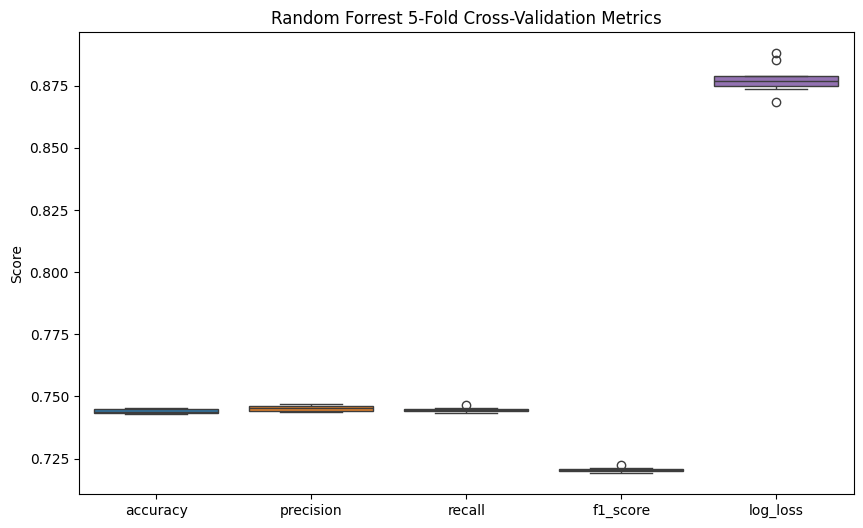

Boxplot saved to RandomForrestCV.png


In [20]:
# Edit Here

x_train = x_train
y_train = y_train
train_id = train_id

x_test = x_test
y_test = y_test
test_id = test_id

# Call the cross-validation function
results = perform_cross_validation(x_train, y_train, scoring_function)
#print(results)

# Plot the results
plot_cross_validation_results(results)

In [30]:
# Training and Predicting

x_train = x_train
print(x_train.head())
y_train = y_train
train_id = train_id

x_test = x_test
y_test = y_test
test_id = test_id

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def random_forest_predict_proba_auto_handle(x_train, y_train, x_test):
    '''
    Trains a Random Forest classifier on the training data, outputs validation accuracy,
    and returns predicted probabilities for the test set with numeric class labels.

    This version removes problematic classes (with too few members) and ensures that
    predictions are made regardless of class size issues.
    '''

    # Step 1: Identify and remove classes with fewer than 2 members
    unique, counts = np.unique(y_train, return_counts=True)
    class_counts = dict(zip(unique, counts))

    # Filter out classes with fewer than 2 members
    valid_classes = [class_label for class_label, count in class_counts.items() if count >= 2]

    # Create a mask to filter valid classes
    mask = np.isin(y_train, valid_classes)
    x_train_filtered = x_train[mask]
    y_train_filtered = y_train[mask]

    try:
        # Step 2: Perform the train-test split without stratification (80% train, 20% validation)
        x_train_split, x_val, y_train_split, y_val = train_test_split(
            x_train_filtered, y_train_filtered, test_size=0.2, random_state=42  # No stratify
        )
    except ValueError as e:
        # If train_test_split fails due to class size issues, continue without splitting
        print(f"Train-test split error due to class sizes: {e}")
        x_train_split, y_train_split = x_train_filtered, y_train_filtered
        x_val, y_val = x_train_split, y_train_split  # Using entire data as validation as fallback

    # Step 3: Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Step 4: Train the model on the training split
    rf_model.fit(x_train_split, y_train_split)

    # Step 5: Predict on the validation set
    y_val_pred = rf_model.predict(x_val)

    # Step 6: Calculate validation accuracy
    validation_accuracy = accuracy_score(y_val, y_val_pred)

    # Step 7: Predict probabilities on the test set
    y_pred_probs = rf_model.predict_proba(x_test)

    # Step 8: Create a DataFrame for predicted probabilities with numeric class labels
    predicted_df = pd.DataFrame(y_pred_probs, columns=rf_model.classes_)

    # Step 9: Ensure all classes are represented
    all_classes = np.arange(1, 16)  # Adjust as per your class range
    for class_label in all_classes:
        if class_label not in predicted_df.columns:
            predicted_df[class_label] = 0.0  # Assign zero probability to missing classes

    predicted_df = predicted_df[all_classes]  # Reorder DataFrame

    return predicted_df, validation_accuracy

# Call the function
y_pred_probs, validation_accuracy = random_forest_predict_proba_auto_handle(x_train, y_train, x_test)

# Continue with your existing code
if y_pred_probs is not None:
    y_pred_df = y_pred_probs.copy()
    y_pred_df.insert(0, 'Animal.ID', test_id.reset_index(drop=True))
    print(y_pred_df.head())
    y_pred_df.to_csv("RFy_pred_df.csv", index=False)

    y_test_df = pd.DataFrame({
        'Animal.ID': test_id.reset_index(drop=True),
        'Outcome.Type': y_test.reset_index(drop=True)  # No need for inverse mapping
    })

    print(y_test_df.head())

    # Final Scoring
    print("Random Forest without PCA")
    random_forrest_score = scoring_function(y_pred_df, y_test_df)

    # Convert the dictionary to a DataFrame
    random_forrest_score_df = pd.DataFrame([random_forrest_score])

    # Save the DataFrame to a CSV file
    random_forrest_score_df.to_csv("random_forrest_score.csv", index=False)
    print("Random Forest score saved to 'random_forrest_score.csv'")

    Name  Animal.Type  Sex   Age  Intake.Type  Abyssinian  Affenpinscher  \
0  19560            1    1   7.0            1           0              0   
1  19560            1    1   6.0            1           0              0   
2  16845            1    1  10.0            2           0              0   
3   4665            1    1  16.0            1           0              0   
4   5095            1    2  15.0            3           0              0   

   Afghan  African  Airedale  ...  Intake.Day  Intake.Month  Intake.Year  \
0       0        0         0  ...          19            12         2014   
1       0        0         0  ...           7             3         2014   
2       0        0         0  ...           2             4         2014   
3       0        0         0  ...          16            11         2013   
4       0        0         0  ...          16            11         2013   

   Outcome.Day  Outcome.Month  Outcome.Year  Intake.Hour  Outcome.Hour  \
0           